In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hilde.helpers.sobol import RandomState
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [2]:
nsamples = 200
nmax = 1000

In [3]:
rng = RandomState(dimension=2, seed=3, failsafe=False)

# The following code is based on the Sobol sequence generator by Frances
# Y. Kuo and Stephen Joe. 
# Copyright (c) 2008, Frances Y. Kuo and Stephen Joe
# All rights reserved.
# More info: https://web.maths.unsw.edu.au/~fkuo/sobol/


In [4]:
# the two are equivalent because `RandomState` was initialized with `dimension=2`
# qseq = rng.rand(nsamples, 2)
qseq = rng.rand(2 * nsamples).reshape((nsamples, 2))
qseq[:3]

array([[0.57910156, 0.48730469],
       [0.07910156, 0.98730469],
       [0.11035156, 0.45605469]])

In [5]:
qseq[:3], qseq.shape

(array([[0.57910156, 0.48730469],
        [0.07910156, 0.98730469],
        [0.11035156, 0.45605469]]), (200, 2))

In [6]:
pseq = np.random.rand(nsamples, 2)
pseq[:3], pseq.shape

(array([[0.2616585 , 0.8834045 ],
        [0.22732384, 0.83268761],
        [0.65446396, 0.4502999 ]]), (200, 2))

In [7]:
def idx(nsamples, seed=14, low=100, nmax=nmax):
    np.random.seed(seed)
    idx = np.random.randint(low=low, high=nmax, size=2*nsamples)
    return np.unique(idx)[:nsamples]
idx(nsamples)[:10], len(np.unique(idx(nsamples)))

(array([102, 107, 108, 112, 115, 118, 119, 122, 125, 126]), 200)

In [8]:
pqseq = rng.rand(nmax, 2)[idx(nsamples)]
pqseq[:10], pqseq.shape

(array([[0.39404297, 0.30029297],
        [0.70654297, 0.98779297],
        [0.95654297, 0.23779297],
        [0.58154297, 0.36279297],
        [0.61279297, 0.83154297],
        [0.48779297, 0.20654297],
        [0.98779297, 0.70654297],
        [0.17529297, 0.01904297],
        [0.42529297, 0.76904297],
        [0.30029297, 0.39404297]]), (200, 2))

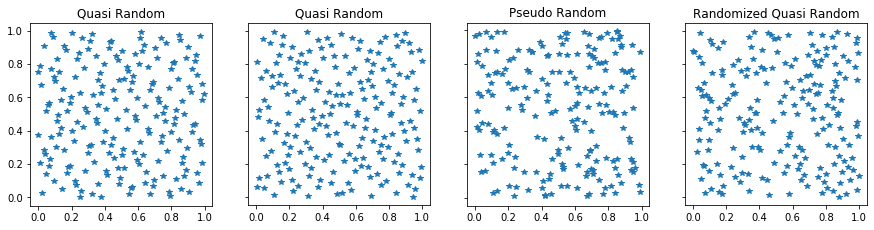

In [9]:
np.random.seed(105)
ri = lambda nmax: np.random.randint(low=200, high=nmax)

fig, axs = plt.subplots(ncols=4, sharey=True, 
                        subplot_kw={'aspect': 1}, 
                        figsize=2*(15,))
axs[0].plot(*qseq[-nsamples:].T, '*')
axs[0].set_title('Quasi Random')
axs[1].plot(*rng.rand(nsamples, 2).T, '*')
axs[1].set_title('Quasi Random')
axs[2].plot(*pseq.T, '*')
axs[2].set_title('Pseudo Random')
axs[3].plot(*pqseq.T, '*')
axs[3].set_title('Randomized Quasi Random')

plt.show()

## What happens if one initializes the dimension incorrectly?
Example: initialize with `dimension=3` but use 2x1 samples as before

# The following code is based on the Sobol sequence generator by Frances
# Y. Kuo and Stephen Joe. 
# Copyright (c) 2008, Frances Y. Kuo and Stephen Joe
# All rights reserved.
# More info: https://web.maths.unsw.edu.au/~fkuo/sobol/


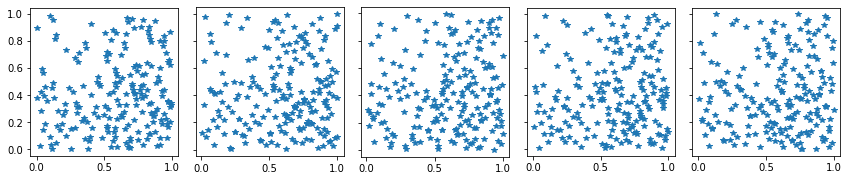

In [10]:
rng = RandomState(dimension=3, seed=3, failsafe=False)

nfig = 5
fig, axs = plt.subplots(ncols=nfig, sharey=True,
                        subplot_kw={'aspect': 1}, 
                        figsize=(12, 8))
for ii in range(0, nfig):
    axs[ii].plot(*rng.rand(nsamples, 2).T, '*')

# fig.suptitle('Quasi Random with wrong initializer')

plt.tight_layout()
plt.show()